**FoodHub Data Analysis**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? 

In [4]:
df.shape

(1898, 9)

#### Observations: 
* There are 1898 rows and 9 columns in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. There are attributes of different types - **int, float, object**
2. There is *1 column* containing datatype of float64 - **cost_of_the_order**
3. There are *4 columns* containing datatype of int64 - **order_id, customer_id, food_preparation_time, delivery_time**
4. There are *4 columns* containing datatype of object - **restaurant_name, cuisine_type, ay_of_the_week, rating**


### **Question 3:** Are there any missing values in the data? 

In [108]:


df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
* There **aren't any missing values** in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [109]:


df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
1. Once the order is placed the **minimum** time taken to prepare a food is **20min**.
2. Once the order is placed the **average** time taken to prepare a food is **27.37197min**.
3. Once the order is placed the **maximum** time taken to prepare a food is **35.0min**.


### **Question 5:** How many orders are not rated? 

In [110]:


df["rating"].unique()

df.groupby("rating")["rating"].count()

rating
3            188
4            386
5            588
Not given    736
Name: rating, dtype: int64

#### Observations:  
* **736 orders** are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### COUNTPLOT 

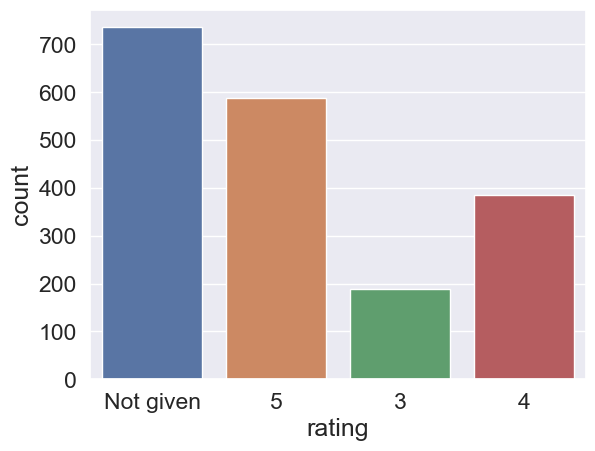

In [111]:
sns.countplot(data=df, x='rating');

In [112]:
rating = pd.DataFrame(data=[df['rating'].value_counts(normalize=True)[0]*100, 
        df['rating'].value_counts(normalize=True).sum()*100 - df['rating'].value_counts(normalize=True)[0]*100],
        columns=['rating'], index = ['Not given', 'Given'])
rating


,rating
Not given,38.777661
Given,61.222339


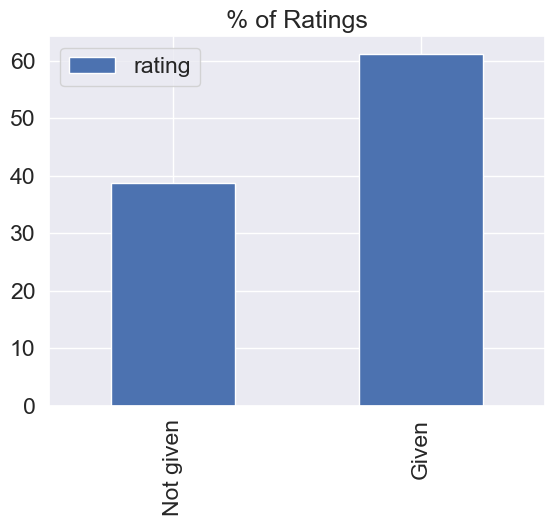

In [42]:
rating.plot(kind='bar')
plt.title('% of Ratings');

### Observation 1:
1. There are only 3 discrete values of rating: ***3, 4, 5 stars***.
2. **Mostly** customers give **5 stars** & the **mininum** rating is **3 stars**.
4. No customers have given any bad ratings. (1 or 2 stars).
5. Around **40% of orders not rated**. More than 60% of total order customer giving ratings.
6. *Rating is important for a business. To help impove the qualification of services and push more sales, the company should find a way to get all the customers rate*.

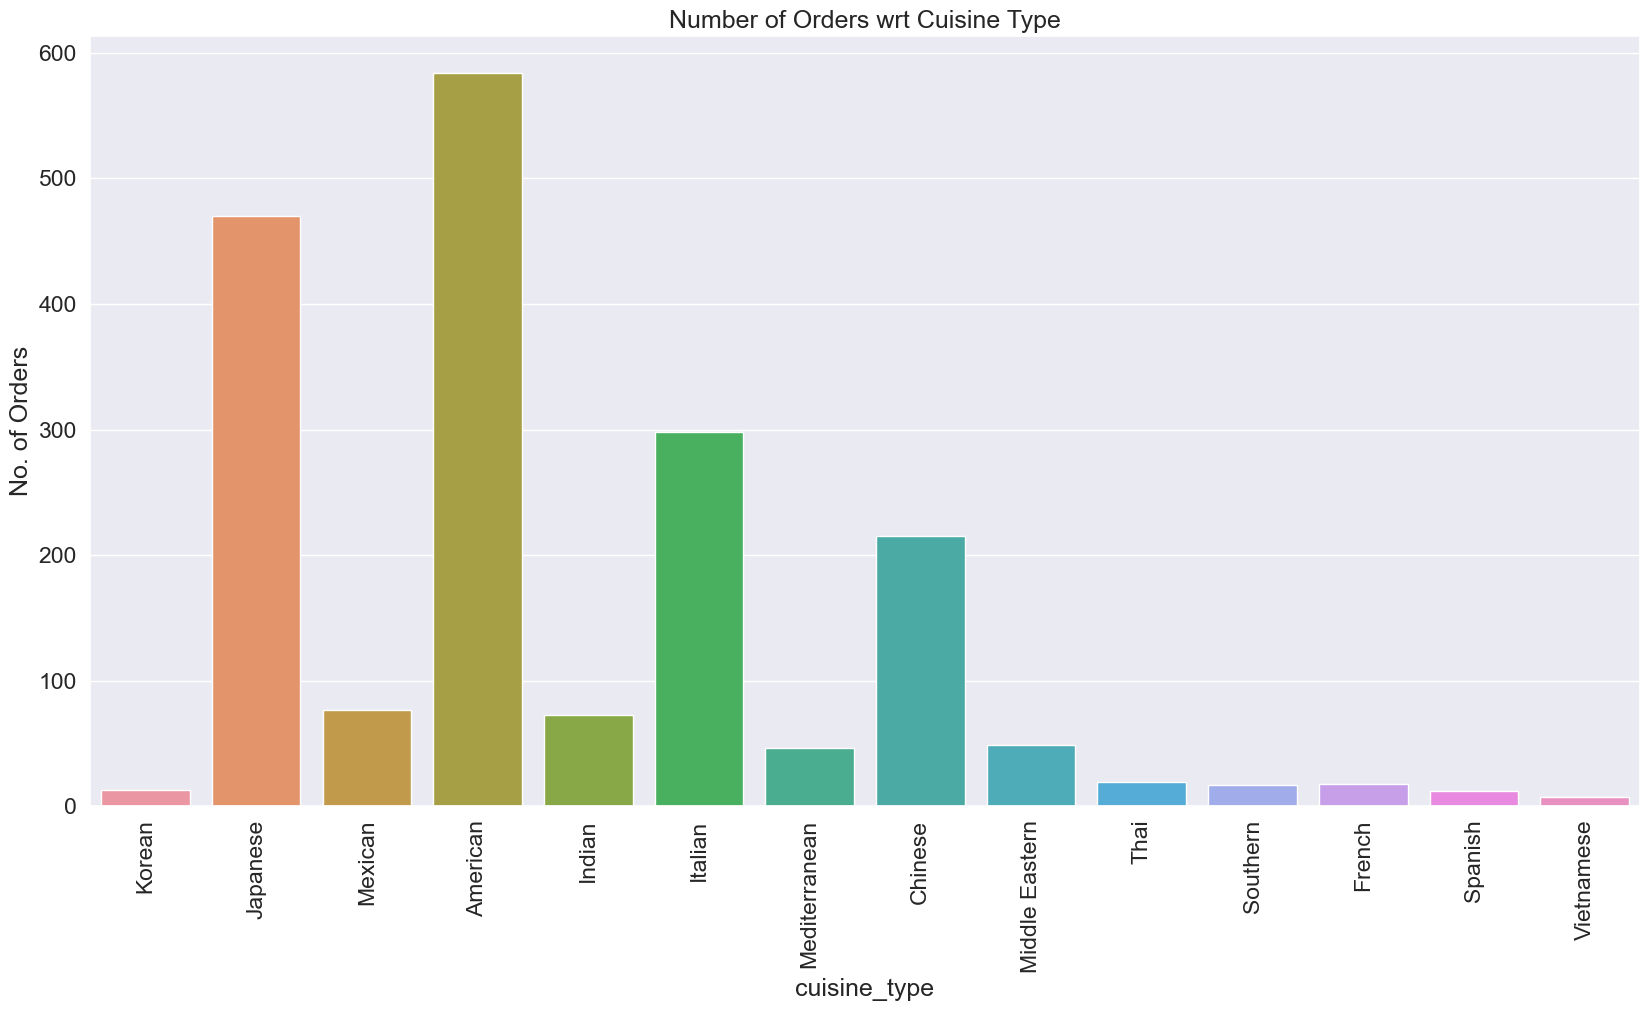

In [133]:


plt.figure(figsize=(20,10))
sns.countplot(data=df,x='cuisine_type')
plt.ylabel('No. of Orders')
plt.title('Number of Orders wrt Cuisine Type')
plt.xticks(rotation=90);

In [118]:
df['cuisine_type'].value_counts().head()

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

#### Observation 2 :
1. **Top 5 cuisines** from where the customers order the most are **American, Japanese, Italian,Chinese and Mexican**.
2. **American cuisine** is the **most popular** cuisine among these top 5 having **584 orders**.
3. **The Vietnam Cuisine** is the **least popular** cuisine having only **7 orders**.
    

In [21]:
df['restaurant_name'].value_counts().head(5).index

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'],
      dtype='object')

#### Observation 3:
* Above are the top 5 popular restaurants, that is **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken' & 'Parm'**

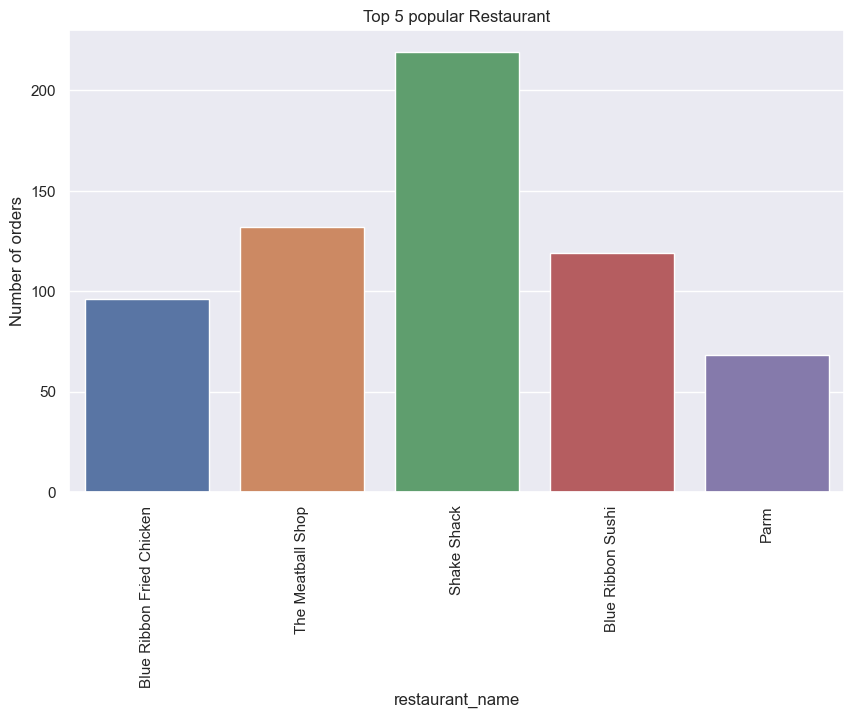

In [134]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['restaurant_name'].isin(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'])], x='restaurant_name')
plt.xticks(rotation=90)
plt.ylabel('Number of orders')
plt.title('Top 5 popular Restaurant');

#### Observation 4:
* The **most popular restraunt is The Shake Shack**, followed by The Meatball Shop and Blue Ribbon Sushi restaurants.

In [28]:
df['customer_id'].value_counts().nlargest(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

In [129]:
df['customer_id'].value_counts(ascending=True)

384698     1
67848      1
84045      1
87151      1
367076     1
          ..
259341     7
250494     8
83287      9
47440     10
52832     13
Name: customer_id, Length: 1200, dtype: int64

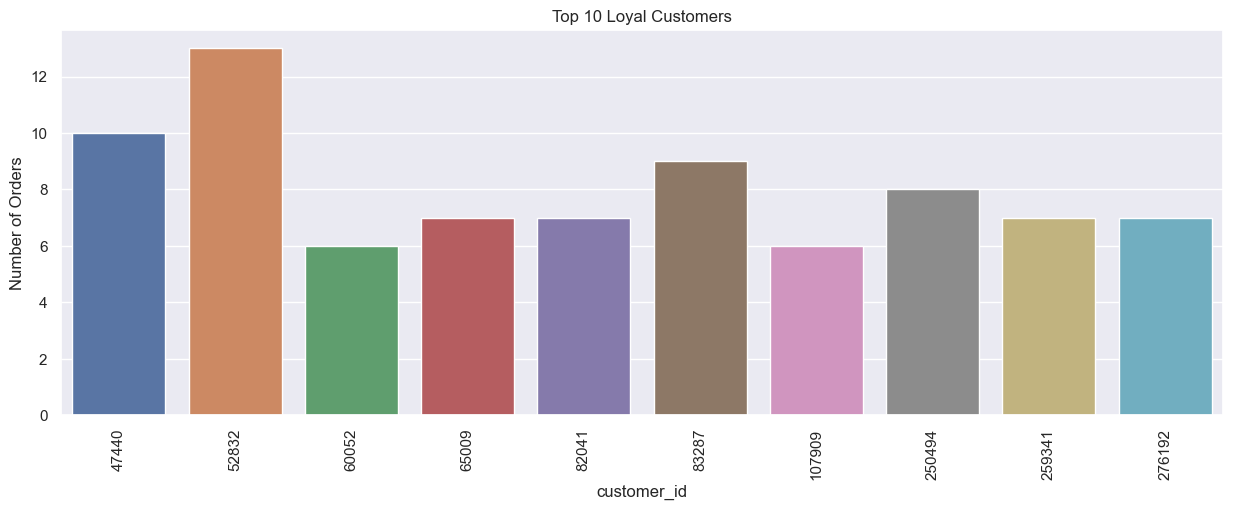

In [135]:
plt.figure(figsize=(15,5))
sns.countplot(data=df[df['customer_id'].isin([52832, 47440, 83287, 250494, 259341, 65009, 82041, 276192, 107909,
            60052])], x='customer_id')
plt.xticks(rotation=90)
plt.title('Top 10 Loyal Customers')
plt.ylabel('Number of Orders');

#### Observation 5:
1. The **highest order** has come from the customer, having **Id 52832**.
2. Mostly, the **top 10 customers have placed orders** around **6-10 times**.
3. There are many customers who have placed orders just once.

In [30]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

<Figure size 1200x800 with 0 Axes>

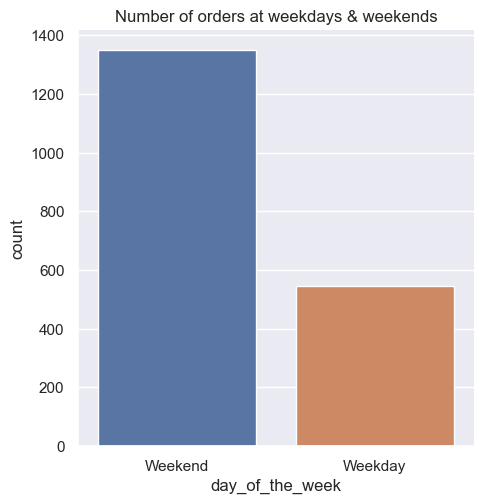

In [136]:
sns.set(font_scale=1)
plt.figure(figsize=(12,8))
sns.catplot(data=df, x='day_of_the_week', kind='count')
plt.title('Number of orders at weekdays & weekends');

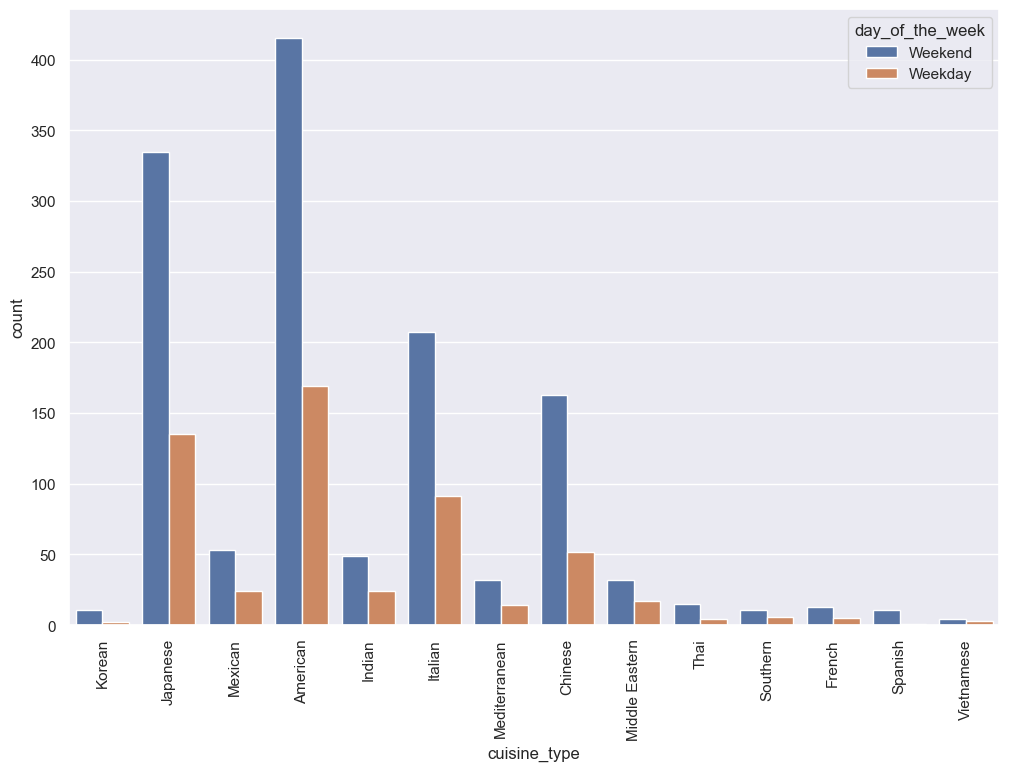

In [137]:
sns.set(font_scale=1)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

#### Observation 6:
1. There are a lots of order placed in weekends specially for **Chinese, Italian, American & Japanese cuisines**.
2. The **orders placed in weekends** are almost **twice** that of the orders placed in weekdays.
3. The restraunts have more customers and are busy more at weekends.


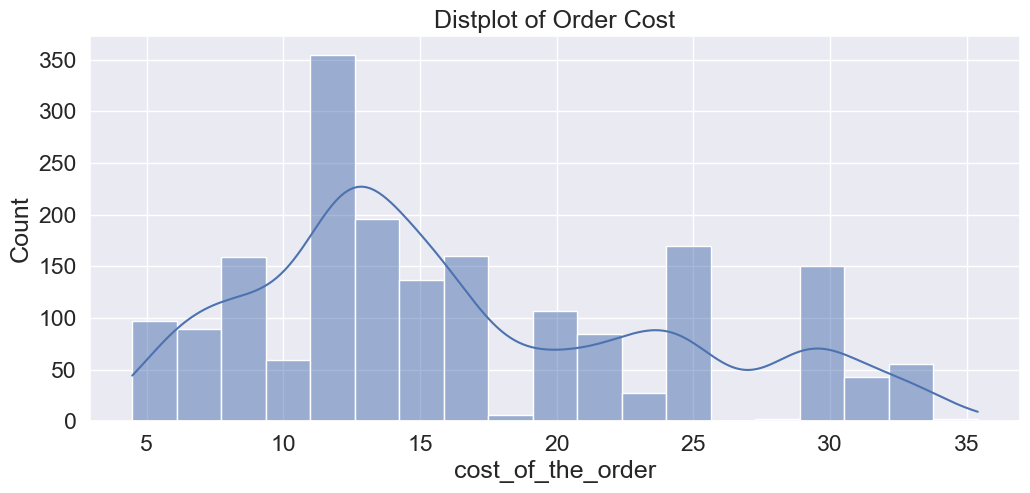

In [37]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Distplot of Order Cost');

#### Observation 7:
1. The **Distribution of Order cost** have a **right skewed distribution**.
2. The cost ranges from ***5USD to 35USD***.

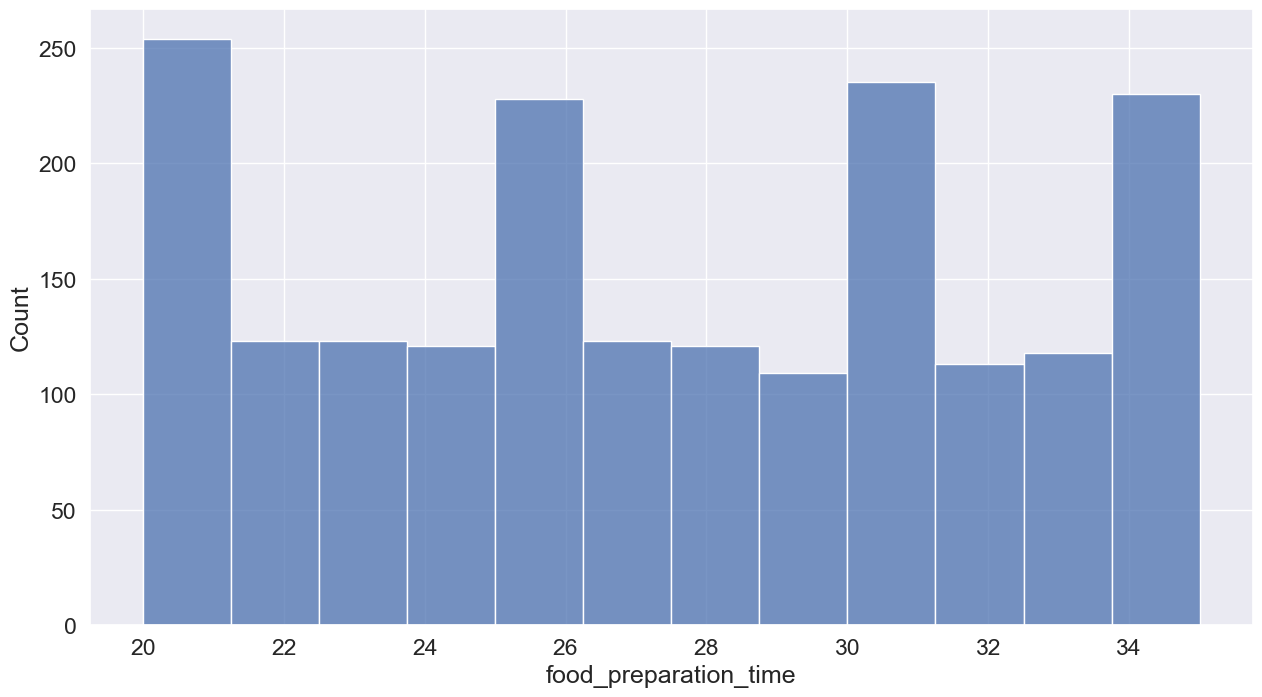

In [44]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='food_preparation_time');

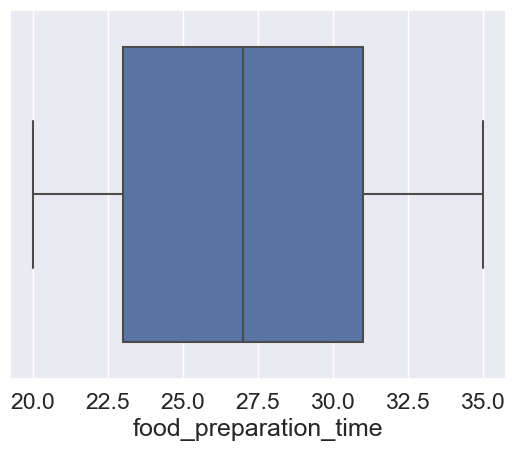

In [45]:
sns.boxplot(data=df, x='food_preparation_time');

#### Observation 8:
1. The **maxinum** to prepare food is **35 minutes**.
2. The **average** time for the food getting prepared is around **27 minutes**.
3. The **minimum** time to prepare food is **20 minutes** which needs to looked into as its quite a high time for small orders.

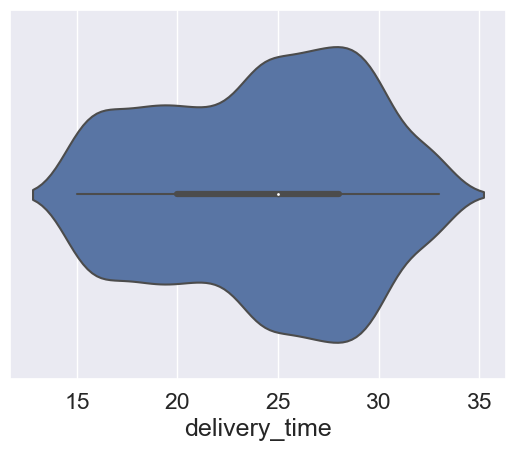

In [47]:
sns.violinplot(data=df, x='delivery_time');

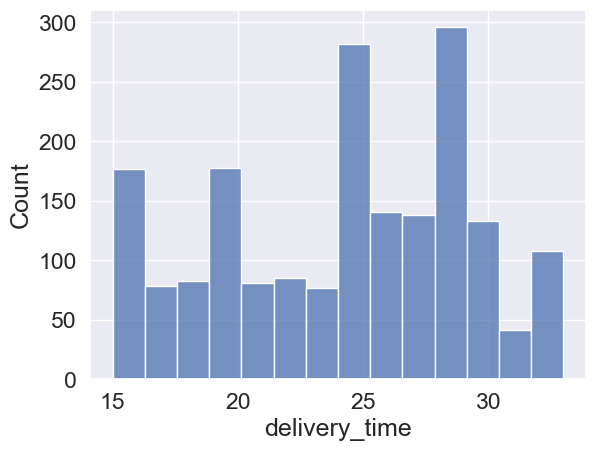

In [48]:
sns.histplot(data=df, x='delivery_time');

#### Observation 9:
1. The ***mininum** time for delivery is around **15 minutes** and the **maxinum** time for delivery is **33 minutes**.
2. The **average** delivery time is around **24 minutes**.
3. There is ***no outliers for delivery time***.

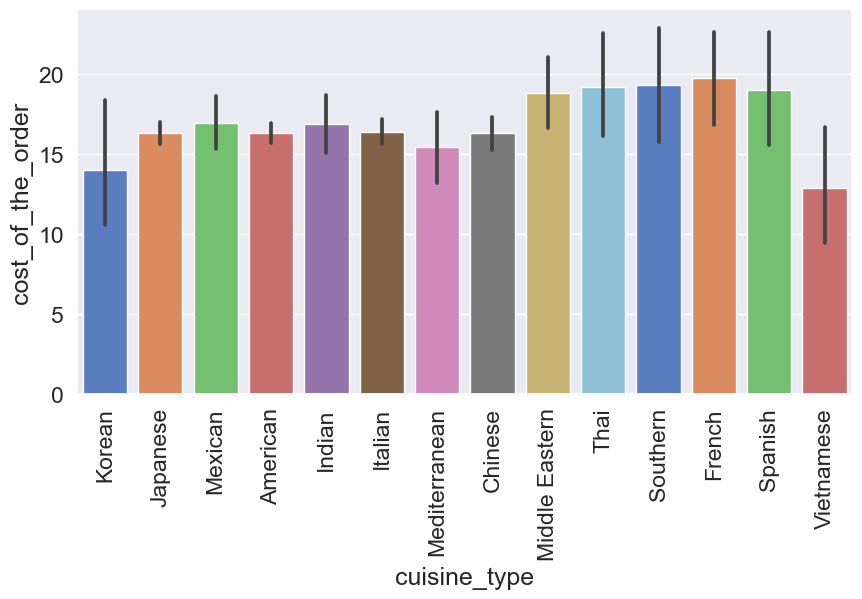

In [51]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='muted') 
plt.xticks(rotation=90,);

#### Observation 10:
* Cuisines like **Middle Eastern, Thai, Southern, French & Spanish** are somewhat **costly cuisines** as compared to others.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [52]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
* Top ***5 restaurants*** which have the highest number of order are : **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm**


### **Question 8**: Which is the most popular cuisine on weekends?

In [53]:

df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
* **American cuisine is the most popular cuisine on weekends.**

### **Question 9**: What percentage of the orders cost more than 20 dollars? 

In [54]:


len(df[df['cost_of_the_order']>20])/len(df)*100

29.24130663856691

#### Observations:
* *29.24% of the orders cost more than 20USD*.

### **Question 10**: What is the mean order delivery time? 

In [55]:


df['delivery_time'].mean()

24.161749209694417

#### Observations:
* *The mean of delivery time is 24 minutes*.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [56]:


df['customer_id'].value_counts().sort_values(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The IDs of the customers who order the most are:

* 52832 made 13 orders,

* 47440 made 10 orders,

* 83287 made 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


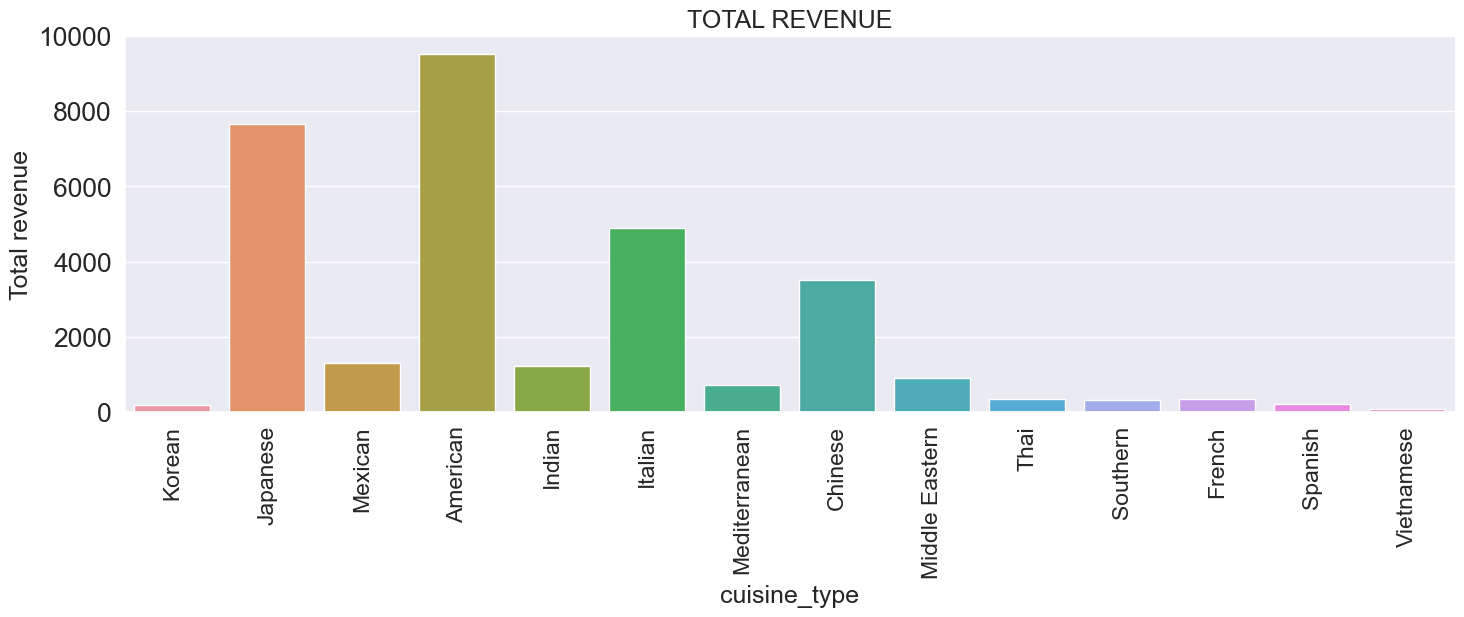

In [102]:


sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order', 
            estimator = np.sum, ci=None, kind='bar', height = 5, aspect = 3 )
plt.xticks(rotation=90)
plt.yticks(fontsize = 19)
plt.ylabel('Total revenue')
plt.title('TOTAL REVENUE');

#### Observation 1:
1. **The American cuisine earn the most revenue**, followed by Japanese and Italian.
2. *least revenue* is earned by the **Vietnamese cuisine**.

In [139]:
a = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()
a

,cuisine_type,restaurant_name
0,American,41
1,Chinese,16
2,French,3
3,Indian,14
4,Italian,31
5,Japanese,29
6,Korean,5
7,Mediterranean,5
8,Mexican,11
9,Middle Eastern,7


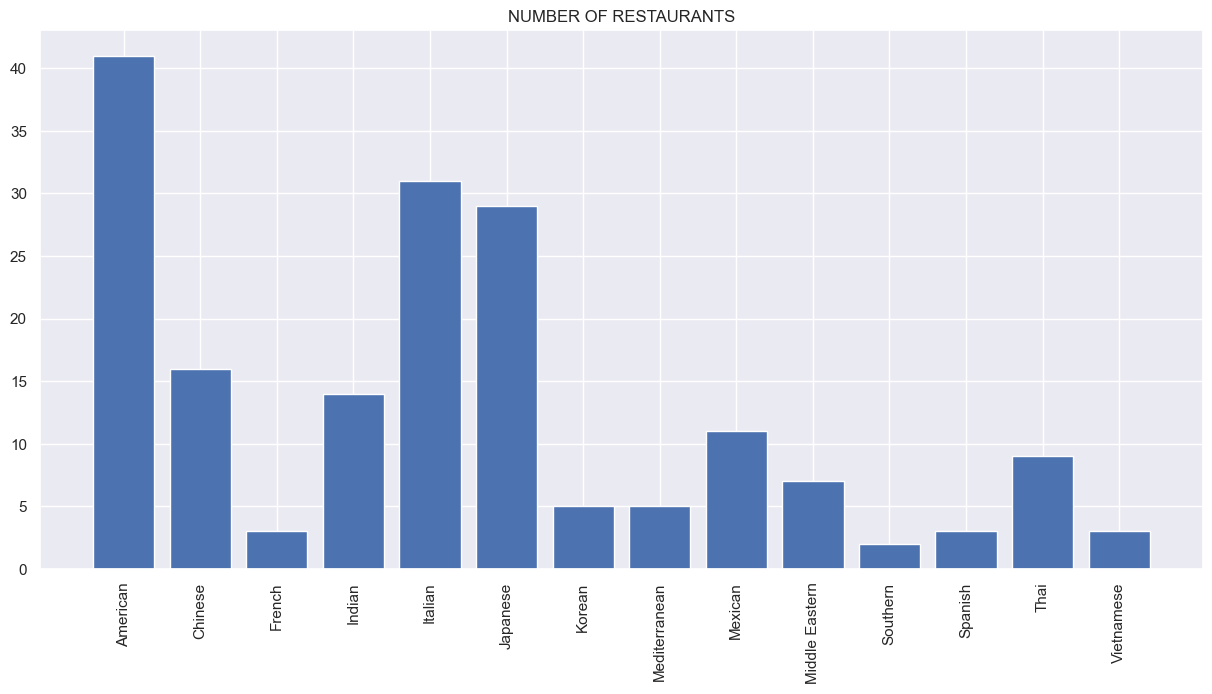

In [140]:
plt.figure(figsize = (15,7))
plt.bar(a['cuisine_type'], a['restaurant_name'])
plt.title('NUMBER OF RESTAURANTS')
plt.xticks(rotation=90);

#### Observation 2:
1. **American cuisine** has the most number of restaurant(around *40 restaurants*), followed by Italian and Japanese cuisines.
2. **Southern cuisine** has the least number of restaurant (which is *only 2*).

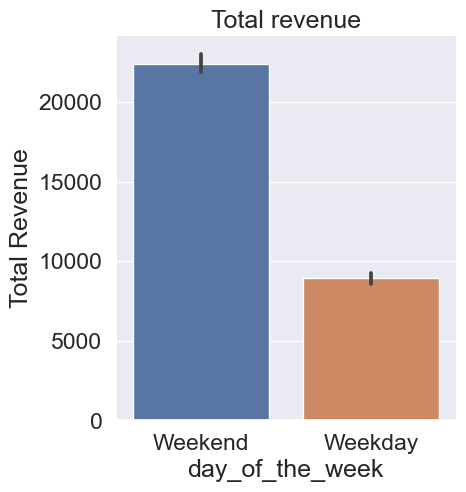

In [66]:
sns.catplot(data=df, x='day_of_the_week', y ='cost_of_the_order', kind='bar', estimator=np.sum);
plt.ylabel('Total Revenue')
plt.title('Total revenue');


#### Observation 3
* *Weekend revenues are greater than that of the Weekday revenues*.

<Axes: xlabel='cost_of_the_order', ylabel='cuisine_type'>

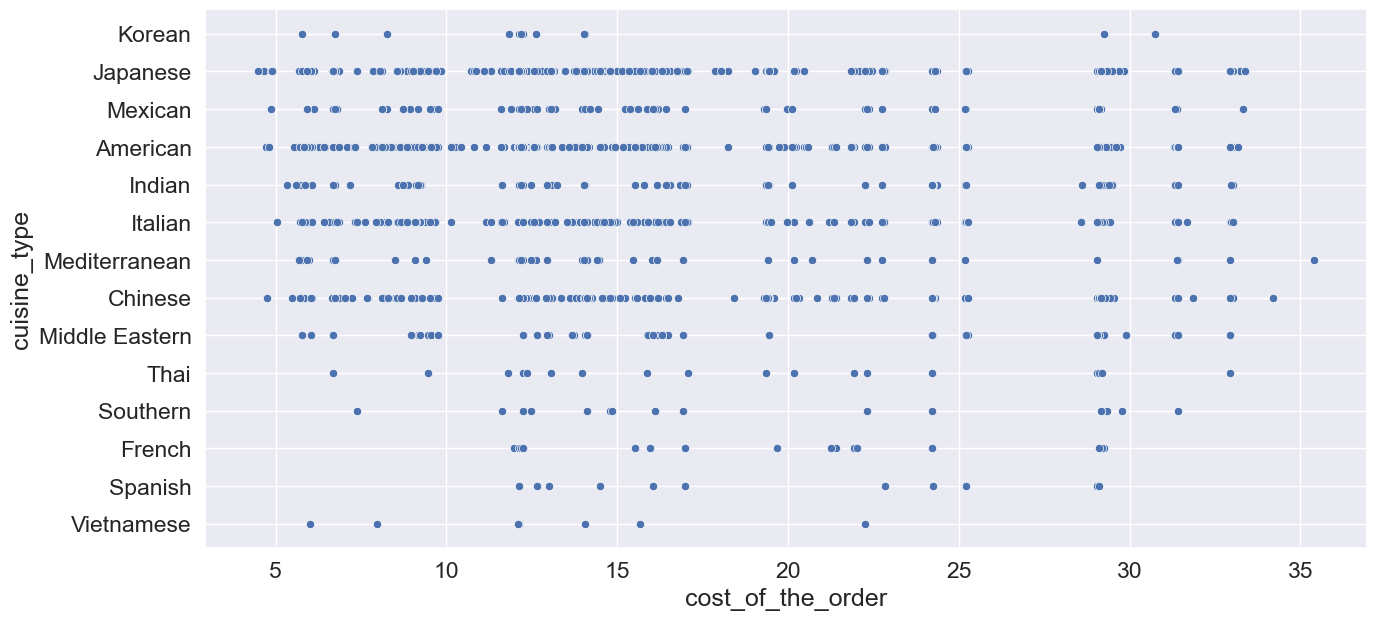

In [68]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, y='cuisine_type', x='cost_of_the_order')

#### Observation 4
1. **Japanese, American, Italian, and Chinese cuisine have the most dense scatter** with the widest range of order cost.
2. *French, Spanish, Vietnames* cuisine have **least orders** with narrow range of order cost.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4224\2356416747.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order',


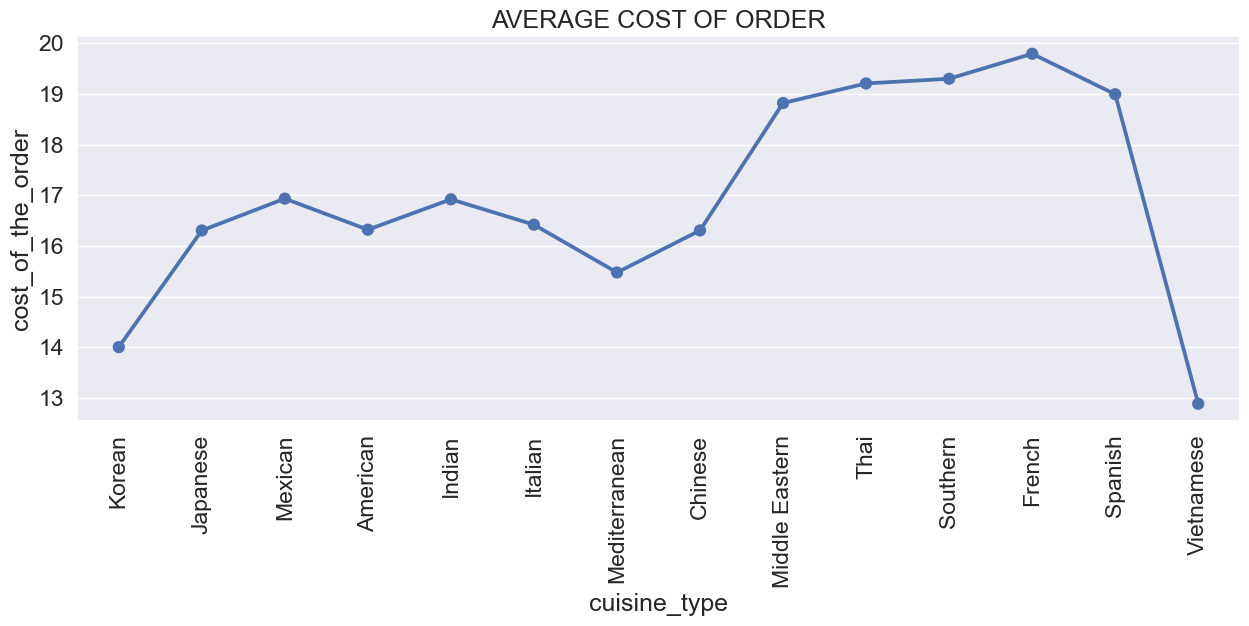

In [69]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order',
              estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('AVERAGE COST OF ORDER');

#### Observation 5
1. **French and Southern** restaurants have the *highest average cost of order*.
2. **The Vietnames restaurants** are offering the *lowest average cost of order*.

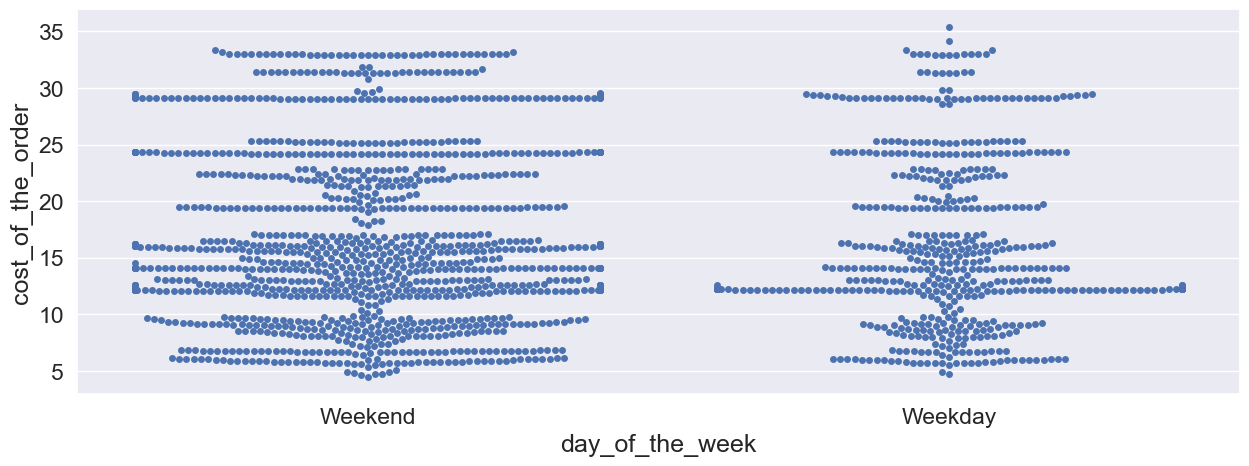

In [71]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 5))
sns.swarmplot(data=df, x='day_of_the_week', y ='cost_of_the_order')
plt.show();

#### Observation 7
1. In weekdays, most customers often order around 12-13USD.
2. In weekends, most customers order around 7-17USD.

<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

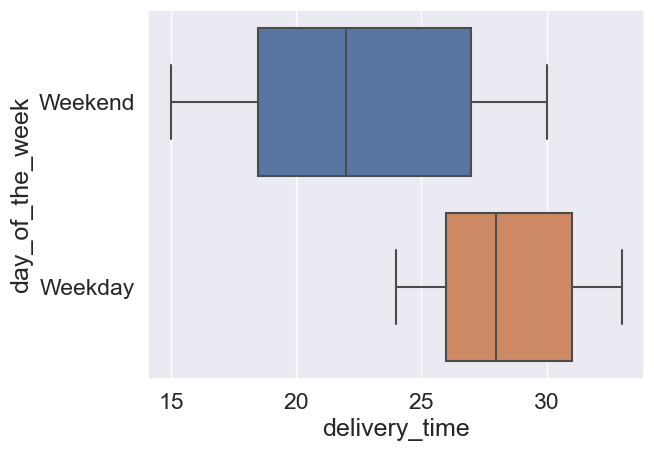

In [74]:
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week', dodge=True)

#### Observation 8
* *The delivery time in weekdays is longer than weekends. This can be understandble because there are always traffic for working hours in weekdays*

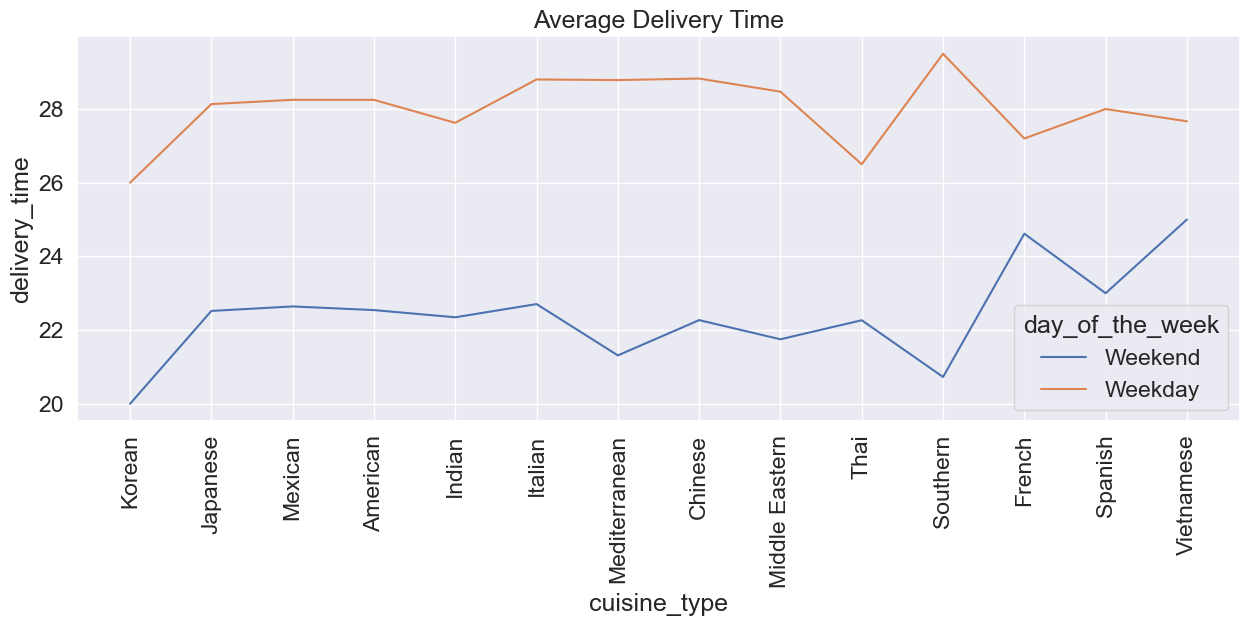

In [75]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='cuisine_type', y='delivery_time', estimator = 'mean', ci=None, hue='day_of_the_week')
plt.xticks(rotation=90)
plt.title('Average Delivery Time');

#### Observation 9
1. The average delivery time in Weekends is maximum in Southern region.
2. The average delivery time in Weekdays is maximum in French.

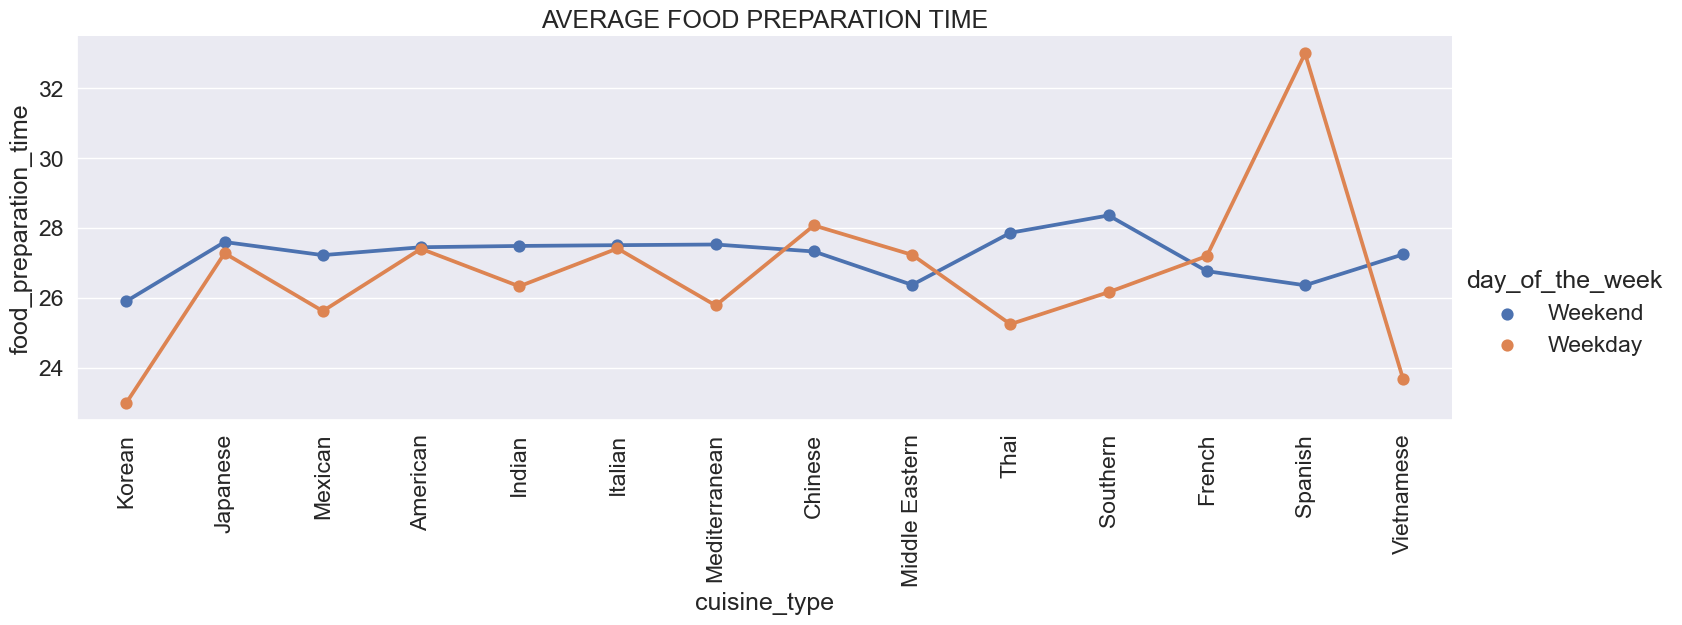

In [76]:
sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', 
            kind='point', estimator=np.mean, height=5, aspect=3, ci=None,hue='day_of_the_week')
plt.xticks(rotation=90)
plt.title('AVERAGE FOOD PREPARATION TIME');

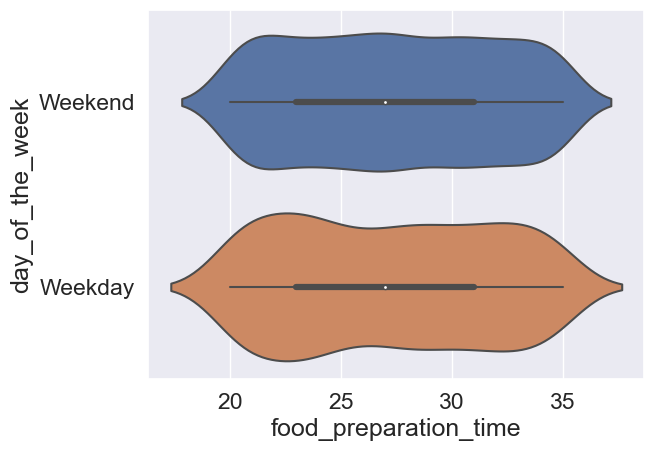

In [77]:
sns.violinplot(data=df, x='food_preparation_time', y ='day_of_the_week', dodge=True);

#### Observation 10
1. **The distribution for preparing food is same between restaurants and day of week** since though there are more orders in the weekends, the average time for preparation is not too much different between weekends and weekdays.  
2. Only **Spanish** restaurant takes a bit **higher preparation time** compared to the others.

<Figure size 1000x500 with 0 Axes>

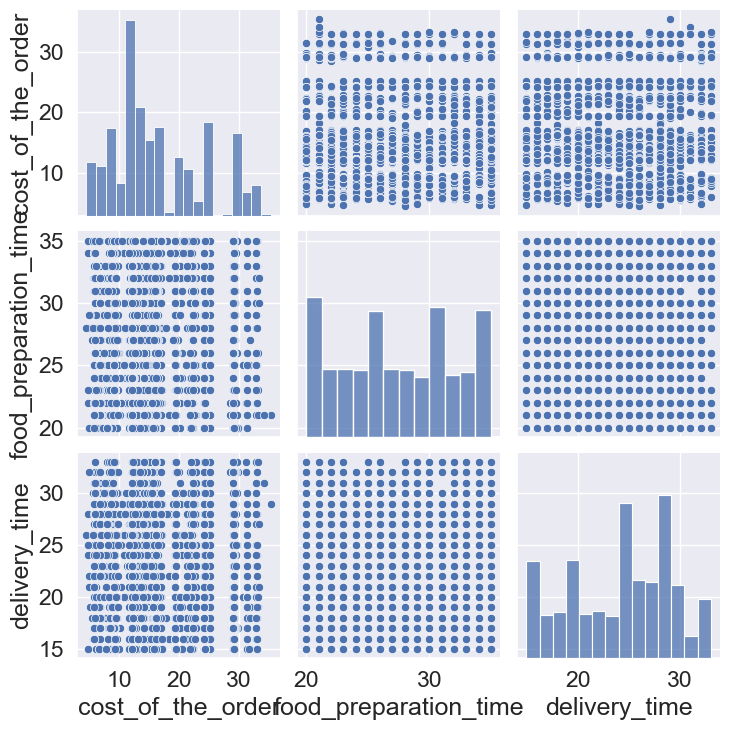

In [85]:
plt.figure(figsize=(10, 5))
sns.pairplot(data = df[['cost_of_the_order','rating',
                            'food_preparation_time', 'delivery_time']]);


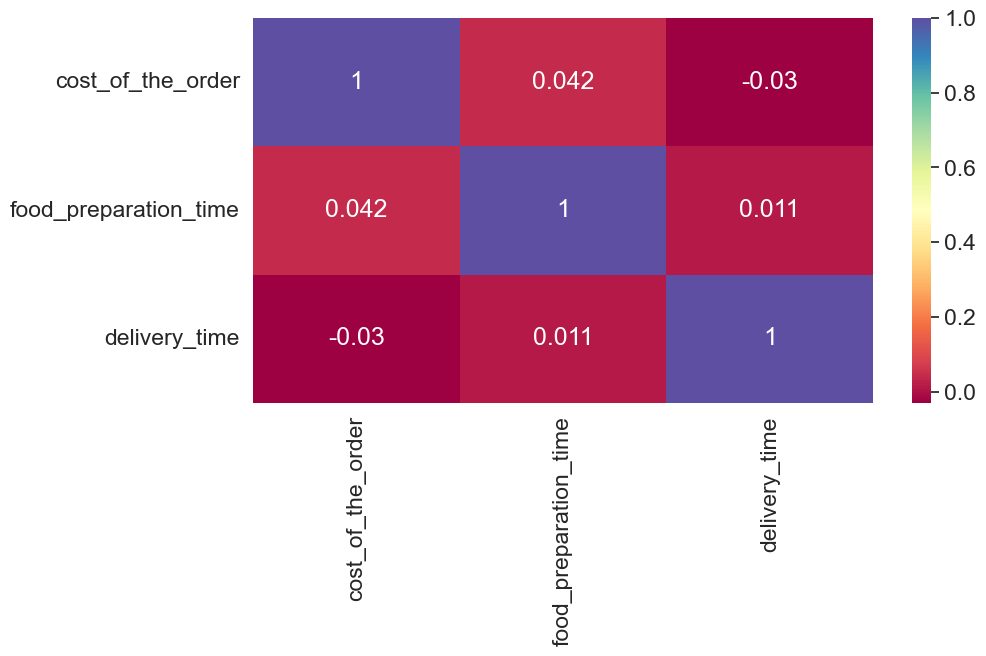

In [84]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['cost_of_the_order','rating','food_preparation_time', 
                    'delivery_time']].corr(), annot=True, cmap='Spectral');

#### Observation 11:
1. From the above heatmap plot we can say that there are **very low correlation** between those variables.
2. **Rating, preparing time, delivery time, and order cost are not related**.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Finding the restaurants fulfilling the criteria to get the promotional offer. 

In [86]:


df_nan = df.replace(to_replace='Not given', value = np.NaN)


In [87]:
df_nan.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


In [88]:
df_nan['rating'] = df_nan['rating'].astype(dtype='float', errors='ignore')

In [89]:
a = df_nan.groupby('restaurant_name')['rating'].mean()
a

restaurant_name
'wichcraft          5.000000
12 Chairs           4.500000
5 Napkin Burger     4.000000
67 Burger           5.000000
Alidoro                  NaN
                      ...   
Zero Otto Nove      4.000000
brgr                3.000000
da Umberto          5.000000
ilili Restaurant    4.153846
indikitch           4.500000
Name: rating, Length: 178, dtype: float64

In [90]:
b = df_nan.groupby('restaurant_name')['rating'].count()
b

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64

In [91]:
c = pd.merge(a,b,how='inner', on = a.index)
c

,key_0,rating_x,rating_y
0,'wichcraft,5.000000,1
1,12 Chairs,4.500000,2
2,5 Napkin Burger,4.000000,2
3,67 Burger,5.000000,1
4,Alidoro,NaN,0
...,...,...,...
173,Zero Otto Nove,4.000000,1
174,brgr,3.000000,1
175,da Umberto,5.000000,1
176,ilili Restaurant,4.153846,13


In [92]:
c[(c['rating_x'] > 4) & (c['rating_y'] > 50)]
    


,key_0,rating_x,rating_y
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations: 
* There are **4 restaurants** that have average rating greater than 4 and rating count more than 50. Those are : **Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop**.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [6]:


df.head(2)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23


In [94]:
revenue_25 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25
revenue_15 = df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15
net_revenue = revenue_25 + revenue_15
net_revenue

8379.539499999999

#### Observations:
* **8379.54 is the Net revenue** generated by the company across all orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [95]:


df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [96]:
len(df[df['total_time']>60]) / len(df) *100
10.537407797681771

10.537407797681771

#### Observations:
* approximately **10.54% of orders** take more than 60 minutes to get delivered from the time the order is place.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [97]:

df.groupby(['day_of_the_week'])['delivery_time'].mean()


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [101]:
df[df['day_of_the_week']=='Weekday']['delivery_time'].mean() - df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

5.870014357297798

#### Observations:
1. The mean delivery time in weekdays is around **28.340037mins**.
2. The mean delivery time for weekend is **22.470022mins**.
3. The difference for delivery time between weekday and weekend is **5.870014357297798mins**.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? 

### Conclusions:
1. The Shake Shack, The Meatball Shop and Blue Ribbon Sushi are the most three popular restaurants. 
2. The four most popular cuisines ordered by patrons are Chinese, Japanese, Italian, and American. The least popular cuisine is Vietnamese food.
3. The cuisines that receive the highest average ratings are Spanish, followed by Thai and Indian. The cuisine from Vietnam is rated the lowest. 
4. There are lots of orders placed in weekend more than weekdays.
5. French and Southern restaurants have the highest average cost of order. The Vietnames restaurants are offering the lowest average cost of order. 
6. It takes minimun 20 minutes and maximum 35 minutes to get the food ready for delivery which is quite high.
7. As the minimum time taken by them to prepare food is 20 mins , so they might face a decrease in demand for their food especially when small orders are concerned. 
7. The customers are pretty much satisfied with their orders. There isn't any customers who gave bad ratings.
8. There are people who did not give any rating. This should be taken into account and more easier and faster rating apps or system should be followed so as to not to miss any ratings by any customers.
9. The American restaurants earn the most revenue, followed by Japanese and Italian. The Vietnamese restaurants earn the least revenue. 
10. The average delivery time is around 24 minutes. There is no outliers for delivery time.
11. Most users of the app place one or two orders at most. There aren't many consistent users of the app. 
12. People dont order expensive food or make big orders for delivery with this app.
13. Total revenue earned from all restaurant at weekend is more than two times compared to revenue earned at week days.
14. It is apparent that there is a low correlation between these variables: rating, preparation time, delivery time, and order costs.
15. The delivery time in weekdays is longer than weekends. This can be explained by the fact that there is always traffic during working hours on weekdays. There is little variation in the delivery time pattern between the restaurants.


### Recommendations:

* The most popular cuisines among customers are American, Italian, Chinese, and Japanese. Therefore, the company should seek to increase sales by bringing in more new customers and maintaining its existing customers in order to increase revenue.
* Customers dont place the big order within the app (max order around 35USD). Considering that The Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are the most popular restaurants, the company could increase sales and profit by creating promotion and reward programs to motivate customers to place large orders.
* Rating is important for a business. In order to improve the qualification of services and increase sales, the company should find a way to encourage every customer to rate, such as simplifying the rating process, making it faster, easier, and more convenient.
* Restaurants can improve customer's satisfication and earn more revenue by reducing the time for preparing food. A lower charge for fast orders with high ratings can be offered by the company to encourage restaurants to prepare food more quickly.
* The app does not have many loyal customers. So the company should work on how to keep customers using its app ordering food. For example, the company can create a reward system like giving the customers some points based on numbers and cost of the orders, when the points reach at some level, customers can get a discount coupon or free meals.
* On weekdays, delivery times are quite lengthy, so it is imperative that the company work with the delivery parties to resolve this issue.
* Additionally, the company may be able to attract/introduce customers to restaurants/cuisines that are not very popular (Vietnamese, Thai, Spanish) by offering a free delivery on the first order or by offering discounts.

---